In [405]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')

In [406]:
data_2 = pd.read_csv('../output/train_outputs.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()


,Time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_63,Subcar_64,Label
0,1625554196,4343.04985,11583.1162,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,2146.567725,4778.184592,0
1,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,2146.567725,4778.184592,0
2,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,2146.567725,4778.184592,0
3,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982043,900.568709,...,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,2146.567725,4778.184592,0
4,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,2146.567725,4778.184592,0


In [407]:
X_data = data_2.iloc[:, 1:]
target = data_2.iloc[:, -1]

In [408]:
X_data


,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,Subcar_9,...,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_63,Subcar_64,Label
0,4343.049850,11583.1162,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,876.208309,...,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,2146.567725,4778.184592,0
1,4343.049850,11583.1162,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,863.391568,...,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,2146.567725,4778.184592,0
2,4343.049850,11583.1162,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,824.869687,...,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,2146.567725,4778.184592,0
3,4343.049850,11583.1162,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982043,900.568709,894.215299,...,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,2146.567725,4778.184592,0
4,4343.049850,11583.1162,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,876.256241,...,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,2146.567725,4778.184592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,4343.049850,11583.1162,6556.174571,9442.766173,528.866713,558.000896,594.021043,589.810139,586.533034,585.263189,...,231.458420,223.671634,213.805987,216.843261,196.664689,183.847763,166.379085,2146.567725,4778.184592,1
1091,4343.049850,11583.1162,6556.174571,9442.766173,623.353832,656.064021,689.122631,677.832575,679.605768,652.050611,...,428.376003,432.832531,419.967856,360.251301,324.570485,262.727996,200.561711,2146.567725,4778.184592,1
1092,4343.049850,11583.1162,6556.174571,9442.766173,749.683266,778.874187,813.415638,801.330144,816.049018,788.776901,...,283.536594,297.672639,302.062907,230.846269,228.160032,231.140650,250.449596,2146.567725,4778.184592,1
1093,4343.049850,11583.1162,6556.174571,9442.766173,582.927954,602.927027,631.050711,629.971428,640.827590,634.480102,...,339.911753,339.911753,330.025757,265.559786,259.538051,248.171312,259.717154,2146.567725,4778.184592,1


In [409]:
x_train, x_test, y_train, y_test = train_test_split(
    X_data, target,  test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('x_train.shape: ', x_train.shape)
print('x_test.shape: ', x_test.shape)


x_train.shape:  (876, 64)
x_test.shape:  (219, 64)


In [410]:
x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test,  test_size=0.50, random_state=120, shuffle=False)
print('x_test.shape: ', x_test.shape)
print('x_valid.shape: ', x_valid.shape)


x_test.shape:  (109, 64)
x_valid.shape:  (110, 64)


In [411]:
# Scaling
standardizer = StandardScaler()
data_scaled = standardizer.fit_transform(X_data)
data_scaled
print(data_scaled)


[[-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 ...
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]
 [ 2.33773395e+01  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]]


In [412]:
x_test_scaled = standardizer.transform(x_test)
x_test_scaled

array([[-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       ...,
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00]])

In [413]:
x_train = x_train.values.reshape(876, 64, 1)
x_valid = x_valid.values.reshape(110, 64, 1)
x_test = x_test.values.reshape(109, 64, 1)
print('X_train.shape: ', x_train.shape)
print('x_valid.shape: ', x_valid.shape)
print('x_test.shape: ', x_test.shape)


X_train.shape:  (876, 64, 1)
x_valid.shape:  (110, 64, 1)
x_test.shape:  (109, 64, 1)


In [414]:
# Set up parameters
n_steps = 64
n_features = 1

tf.random.set_seed(2)
# Create a traditional RNN network
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        128, input_shape=(n_steps, n_features), return_sequences=True)),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l1'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [415]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall')
])


In [416]:
history_1 = model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=20, batch_size=190, callbacks=[early_stopping])


Epoch 1/13
5/5 [==============================] - 6s 1s/step - loss: 4.5979 - accuracy: 0.5868 - precision: 0.2368 - recall: 0.1718 - val_loss: 4.7710 - val_accuracy: 0.3636 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/13
5/5 [==============================] - 5s 1s/step - loss: 4.3558 - accuracy: 0.7009 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.5270 - val_accuracy: 0.3636 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/13
5/5 [==============================] - 5s 1s/step - loss: 4.1615 - accuracy: 0.7009 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.2923 - val_accuracy: 0.3636 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/13
5/5 [==============================] - 5s 1s/step - loss: 3.9685 - accuracy: 0.7009 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.0674 - val_accuracy: 0.3636 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/13
5/5 [==============================] - 5s 1s/step - loss:

In [417]:
best_score = max(history_1.history['accuracy'])
print(best_score)

0.8984017968177795


In [418]:
history_1.history.keys()


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [419]:
def vis(history, name):
    plt.title(f"{name.upper()}", fontsize=20)
    plt.xlabel('epochs', fontsize=20)
    plt.ylabel(f"{name.lower()}", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}", None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None:
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.05, 1.2), fontsize=20, ncol=1)


def plot_history(history):
    key_value = list(set([i.split("val_")[-1]
                     for i in list(history.history.keys())]))
    plt.figure(figsize=(20, 8))
    for idx, key in enumerate(key_value):
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()


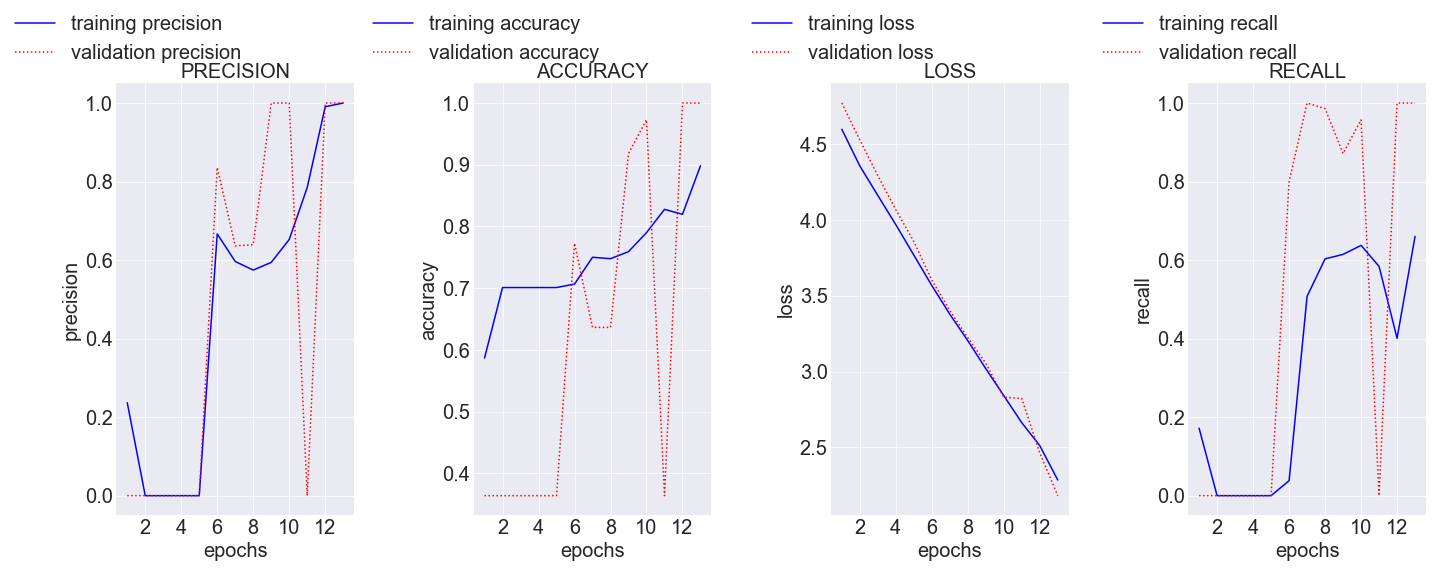

In [420]:
plot_history(history_1)


In [421]:
y_pred = model.predict(x_test, verbose=0)
y_pred


array([[0.76681167],
       [0.7666813 ],
       [0.76706934],
       [0.76700705],
       [0.76665735],
       [0.7664732 ],
       [0.31794095],
       [0.29834875],
       [0.31402397],
       [0.2848351 ],
       [0.30951184],
       [0.30564412],
       [0.7668702 ],
       [0.7666389 ],
       [0.76674587],
       [0.7667978 ],
       [0.7667854 ],
       [0.7626958 ],
       [0.7668388 ],
       [0.7668587 ],
       [0.76680386],
       [0.7668297 ],
       [0.76694477],
       [0.76692176],
       [0.76691353],
       [0.7669865 ],
       [0.7669947 ],
       [0.7670344 ],
       [0.76702815],
       [0.7670225 ],
       [0.7669629 ],
       [0.31992245],
       [0.3212959 ],
       [0.32010746],
       [0.3184073 ],
       [0.7667414 ],
       [0.76694304],
       [0.7668555 ],
       [0.7669754 ],
       [0.7665266 ],
       [0.76662016],
       [0.7667097 ],
       [0.7666949 ],
       [0.7666884 ],
       [0.76669264],
       [0.7666904 ],
       [0.7665454 ],
       [0.766

No handles with labels found to put in legend.


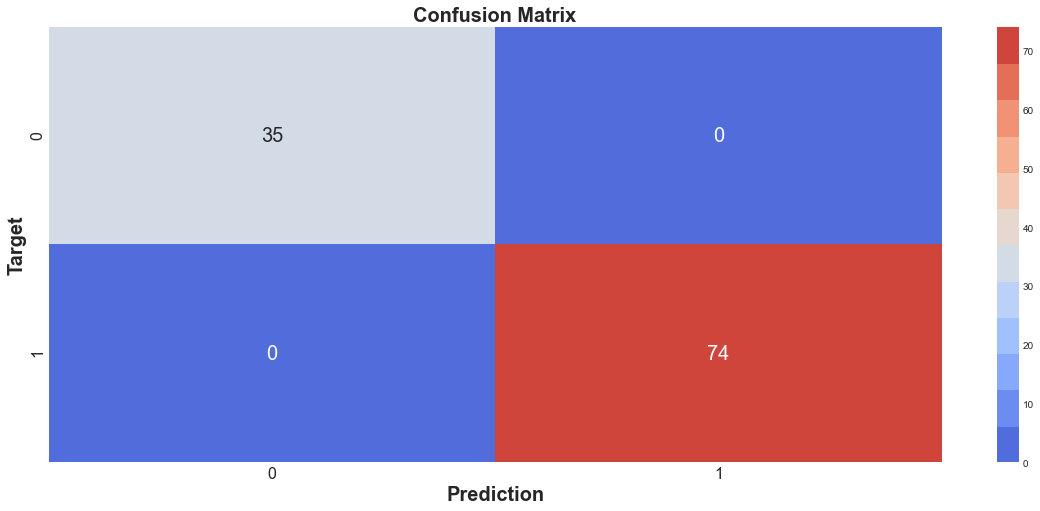

In [450]:
cm = confusion_matrix(y_test, y_pred.round())
plt.figure()
colormap = sns.color_palette("coolwarm", 12)
sns.heatmap(cm, cmap=colormap, annot=True, annot_kws={"size": 20})
plt.xlabel('Prediction', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.ylabel('Target', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.title('Confusion Matrix', fontsize=20, fontweight='bold',
          horizontalalignment='center')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)

In [422]:
tf.random.set_seed(2)
gru_model = tf.keras.Sequential([
    tf.keras.layers.GRU(128, input_shape=(n_steps, n_features), return_sequences=True),
    tf.keras.layers.SimpleRNN(64, 'relu', kernel_regularizer='l1'),
    tf.keras.layers.Dense(1, 'sigmoid')
])


In [423]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)

gru_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])

In [424]:
history_2 = gru_model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=100, batch_size=200, callbacks=[early_stopping])


Epoch 1/100
5/5 [==============================] - 2s 313ms/step - loss: 8.0576 - accuracy: 0.4954 - precision: 0.2750 - recall: 0.4198 - val_loss: 8.1163 - val_accuracy: 0.3636 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 1s 224ms/step - loss: 7.5572 - accuracy: 0.7009 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 7.7353 - val_accuracy: 0.3636 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 1s 224ms/step - loss: 7.2281 - accuracy: 0.7009 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 7.2426 - val_accuracy: 0.3636 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 1s 229ms/step - loss: 6.9173 - accuracy: 0.7009 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 6.8879 - val_accuracy: 0.3636 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 1

In [425]:
best_score = max(history_1.history['accuracy'])
print(best_score)

0.8984017968177795


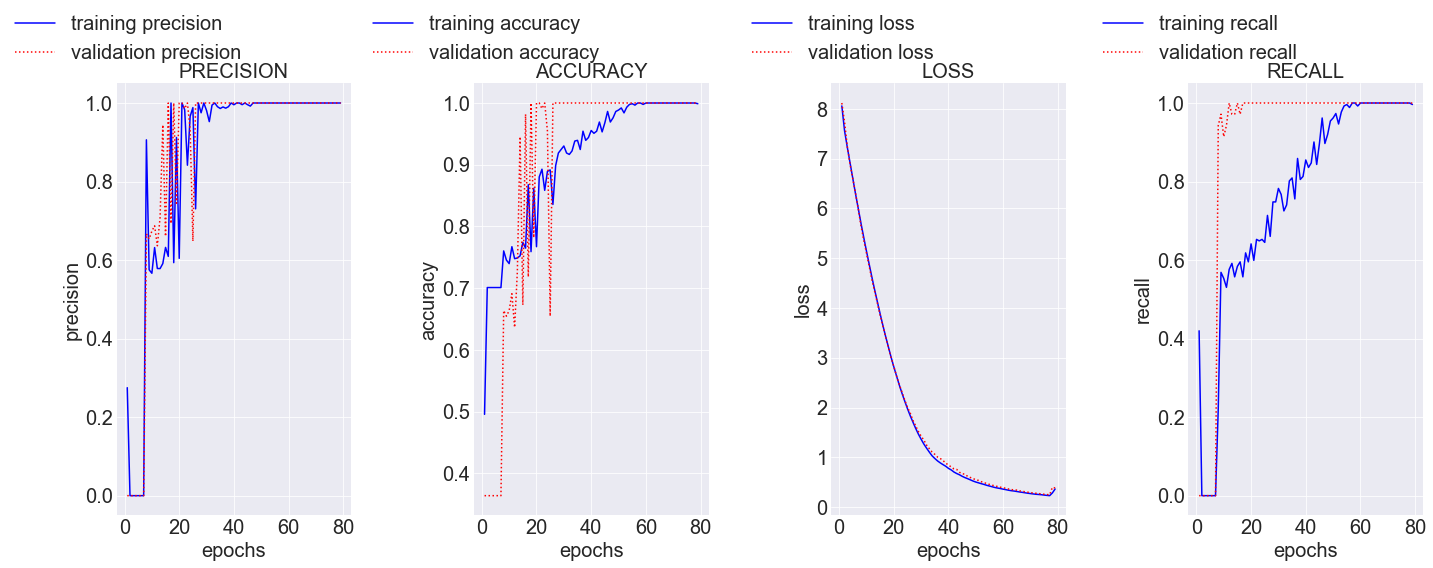

In [426]:
plot_history(history_2)

In [427]:
y_pred_2 = gru_model.predict(x_test, verbose=0)
y_pred_2

array([[0.91989934],
       [0.9207478 ],
       [0.9194976 ],
       [0.9194763 ],
       [0.9215261 ],
       [0.9228427 ],
       [0.07114416],
       [0.0714308 ],
       [0.07051   ],
       [0.07062453],
       [0.07058737],
       [0.07090828],
       [0.91975796],
       [0.92143166],
       [0.9202286 ],
       [0.9206797 ],
       [0.9200384 ],
       [0.9261741 ],
       [0.92006314],
       [0.92002136],
       [0.9199561 ],
       [0.919965  ],
       [0.9199079 ],
       [0.91990465],
       [0.9198016 ],
       [0.919828  ],
       [0.91971415],
       [0.9196546 ],
       [0.91959226],
       [0.91971797],
       [0.9196724 ],
       [0.07127863],
       [0.07161897],
       [0.07128993],
       [0.07078016],
       [0.9203087 ],
       [0.919747  ],
       [0.92106855],
       [0.92254746],
       [0.92367435],
       [0.92266005],
       [0.9233211 ],
       [0.92067754],
       [0.92018557],
       [0.9202859 ],
       [0.9232346 ],
       [0.92401934],
       [0.922

No handles with labels found to put in legend.


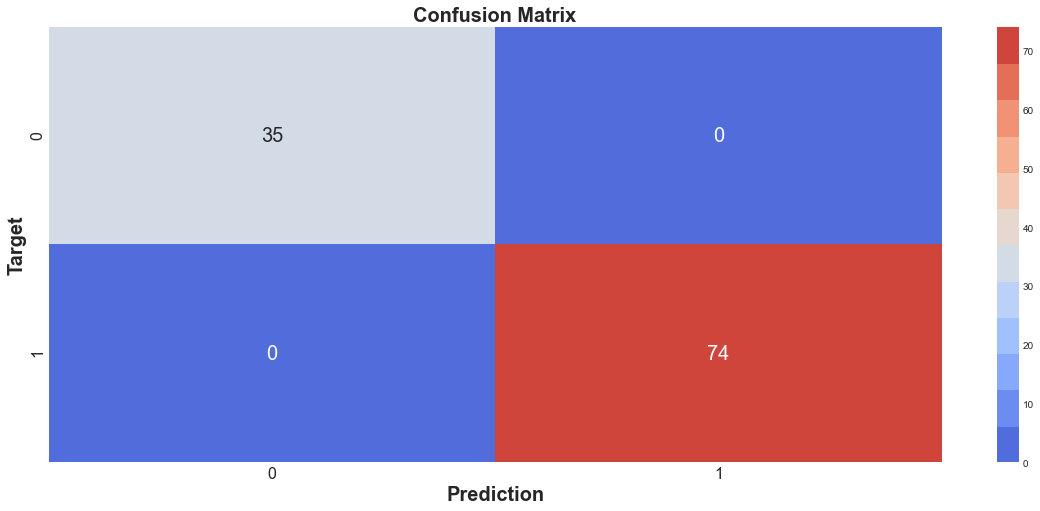

In [448]:
cm = confusion_matrix(y_test, y_pred_2.round())
plt.figure()
colormap = sns.color_palette("coolwarm", 12)
sns.heatmap(cm, cmap=colormap, annot=True, annot_kws={"size": 20})
plt.xlabel('Prediction', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.ylabel('Target', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.title('Confusion Matrix', fontsize=20, fontweight='bold',
          horizontalalignment='center')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)


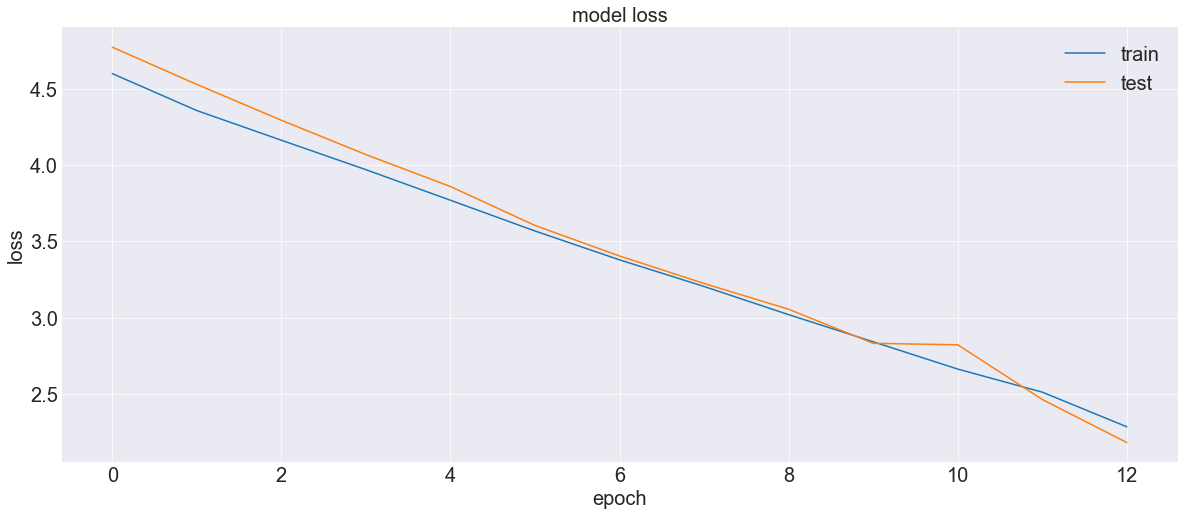

In [428]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'test'], loc='upper right', fontsize=20)
plt.show()


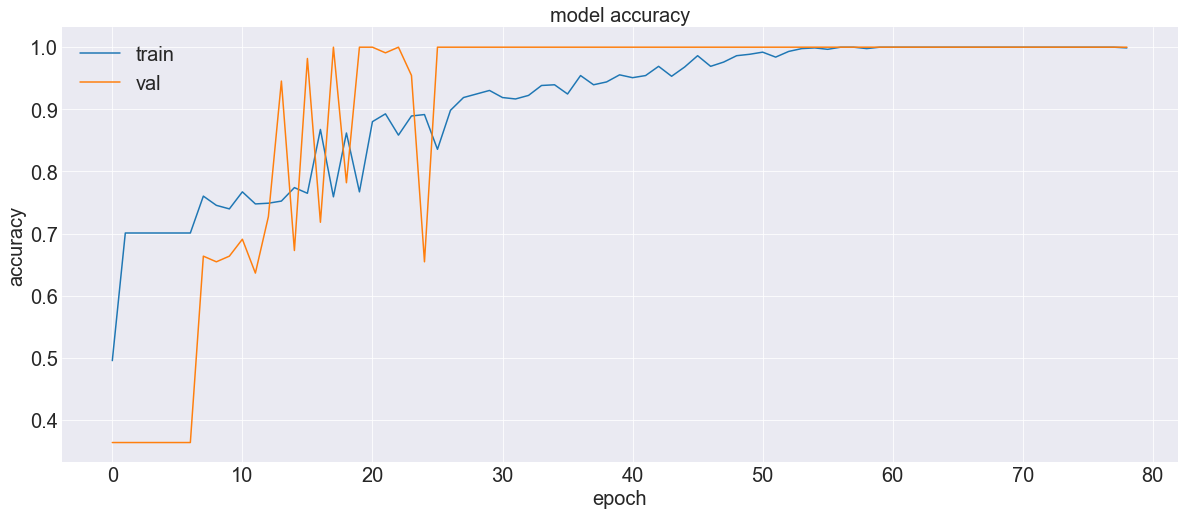

In [429]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy',  fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'val'], loc='upper left', fontsize=20)
plt.show()


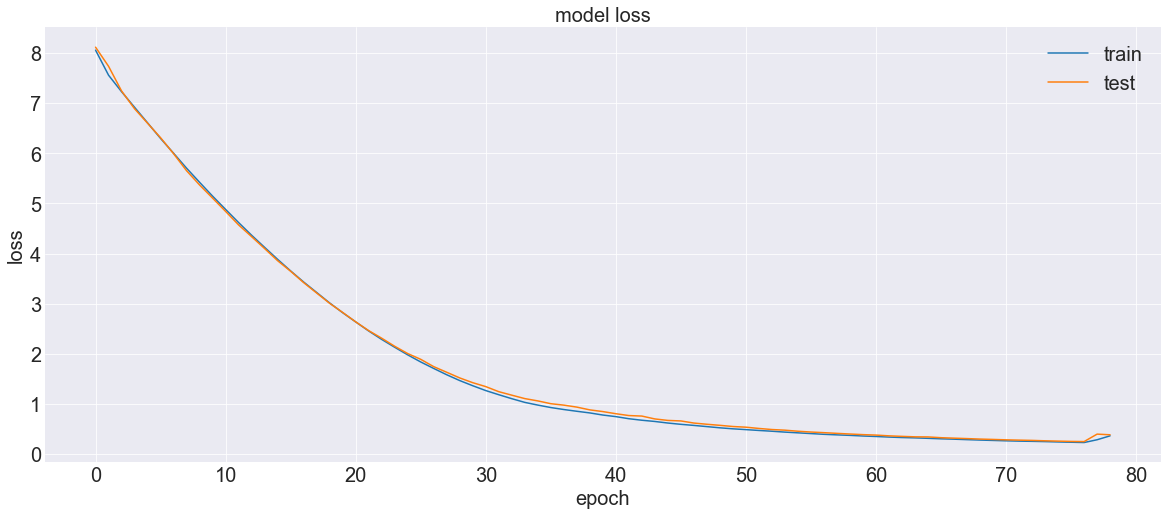

In [430]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'test'], loc='upper right', fontsize=20)
plt.show()
